In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdpipe as pdp

/opt/anaconda3/lib/python3.8/site-packages/pdpipe/col_generation.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [82]:
pip install pdpipe

  Using cached pdpipe-0.3.2-py3-none-any.whl (119 kB)
  Using cached strct-0.0.32-py2.py3-none-any.whl (16 kB)
  Using cached birch-0.0.35-py3-none-any.whl (15 kB)
  Using cached skutil-0.0.18-py2.py3-none-any.whl (21 kB)
  Using cached decore-0.0.1.tar.gz (19 kB)
  Created wheel for decore: filename=decore-0.0.1-py2.py3-none-any.whl size=4192 sha256=33ddb6d5871feee76c5f1b526330e166e998c2c134c73ebe7c9c2e48a5400656
  Stored in directory: /Users/halov/Library/Caches/pip/wheels/5f/0f/bf/0839a33c53db52c2331927850f0140556df14f17c7ed6efeb7
Successfully built decore
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# set max width of cell
pd.options.display.max_colwidth = 300

In [6]:
#suppress scientific notation
np.set_printoptions(suppress=True)
pd.options.display.float_format = "{:.2f}".format

In [7]:
#display all columns
pd.set_option("display.max_columns", None)

In [9]:
#read data

df_train = pd.read_csv("/Users/halov/Documents/YT/data/F_S_M_A_Detection/social_media_train.csv")

In [11]:
display(df_train.head(20), df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             576 non-null    int64  
 1   fake                   576 non-null    int64  
 2   profile_pic            576 non-null    object 
 3   ratio_numlen_username  576 non-null    float64
 4   len_fullname           576 non-null    int64  
 5   ratio_numlen_fullname  576 non-null    float64
 6   sim_name_username      576 non-null    object 
 7   len_desc               576 non-null    int64  
 8   extern_url             576 non-null    object 
 9   private                576 non-null    object 
 10  num_posts              576 non-null    int64  
 11  num_followers          576 non-null    int64  
 12  num_following          576 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 58.6+ KB


,Unnamed: 0,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,0,Yes,0.27,0,0.00,No match,53,No,No,32,1000,955
1,1,0,Yes,0.00,2,0.00,Partial match,44,No,No,286,2740,533
2,2,0,Yes,0.10,2,0.00,Partial match,0,No,Yes,13,159,98
3,3,0,Yes,0.00,1,0.00,Partial match,82,No,No,679,414,651
4,4,0,Yes,0.00,2,0.00,No match,0,No,Yes,6,151,126
5,5,0,Yes,0.00,4,0.00,Partial match,81,Yes,No,344,669987,150
6,6,0,Yes,0.00,2,0.00,Partial match,50,No,No,16,122,177
7,7,0,Yes,0.00,2,0.00,No match,0,No,No,33,1078,76
8,8,0,Yes,0.00,0,0.00,Partial match,71,No,No,72,1824,2713
9,9,0,Yes,0.00,2,0.00,No match,40,Yes,No,213,12945,813


None

In [12]:
# dataset description

In [17]:
data_dict = pd.read_csv("/Users/halov/Documents/YT/data/F_S_M_A_Detection/fake_account__data_dict.csv", index_col="No.")
data_dict.head(30)

,Column name,Data Type,Description
No.,,,
0,'profile_pic',categorical,Whether the account has a profile picture (1) or not (0)
1,'ratio_numlen_username',numerical (float),Ratio of numeric characters in the account username to its length
2,'len_fullname',numerical (int),Number of characters in the user's full name
3,'ratio_numlen_fullname',numerical (float),Ratio of numeric characters in the user's full name to its length
4,'sim_name_username',categorical,"Whether the user's name matches their username completely (1),not at all (0)."
5,'len_desc',numerical (int),Number of characters in the account description
6,'extern_url',categorical,Whether the account description includes a URL (1) or not (2)
7,'private',categorical,Whether the user's posts are visible only to their followers (1) or to all Instagram users (2).
8,'num_posts',numerical (int),Number of posts in the user account


In [18]:
#Determine categorical and numerical features

In [19]:
# numerical columns

num_cols = ["ratio_numlen_username", "len_fullname", "ratio_numlen_fullname", "en_desc", 
           "num_posts", "num_followers", "num_following"
           ]

In [20]:
# categorical columns

cat_cols = ["profile_pic", "sim_name_username", "extern_url", "private", "fake"]

(-1.1, 1.1, -1.1, 1.1)

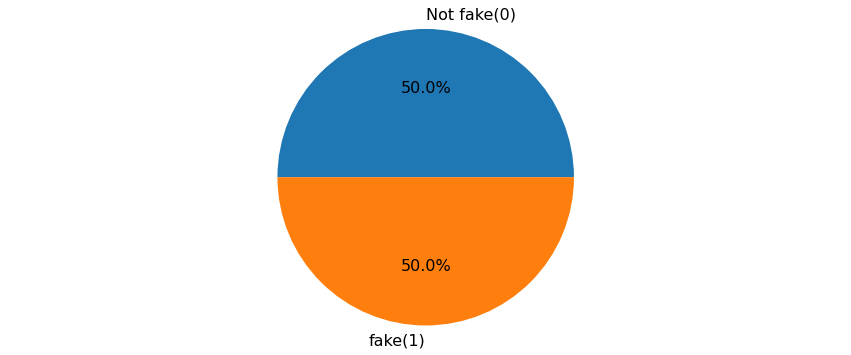

In [26]:
plt.figure(figsize=(15, 6))
fake_share = df_train["fake"].value_counts()
mylabel = ["Not fake(0)", "fake(1)"]
plt.pie(fake_share, labels=mylabel, autopct="%1.1f%%", textprops={"fontsize": 16})
plt.axis("equal")

In [27]:
#check the % of the missing value

In [29]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({"percent_missing (%)": percent_missing})
missing_value_df.sort_values("percent_missing (%)", ascending=False)

,percent_missing (%)
Unnamed: 0,0.00
fake,0.00
profile_pic,0.00
ratio_numlen_username,0.00
len_fullname,0.00
ratio_numlen_fullname,0.00
sim_name_username,0.00
len_desc,0.00
extern_url,0.00
private,0.00


In [45]:
# categorical data

display(df_train.loc[:, cat_cols].head())
print("--")


,profile_pic,sim_name_username,extern_url,private,fake
0,Yes,No match,No,No,0
1,Yes,Partial match,No,No,0
2,Yes,Partial match,No,Yes,0
3,Yes,Partial match,No,No,0
4,Yes,No match,No,Yes,0


--


In [78]:
# label encoding

In [84]:
def label_encoding(df):
    '''
    Function label_encoding() trnasforms categorical features
    represented by strings to binary features containing only
    0s and 1s which can be used for machine learning models.
    Input:
        DataFrame of features
    Output:
        New DataFrame with binary features    
    '''
    # label encoding
    dict_label_encoding = {'Yes': 1, 'No': 0}
    df.loc[:, 'profile_pic'] = df.loc[:, 'profile_pic'].replace(dict_label_encoding)
    df.loc[:, 'extern_url'] = df.loc[:, 'extern_url'].replace(dict_label_encoding)
    df.loc[:, 'private'] = df.loc[:, 'private'].replace(dict_label_encoding)

    # one-hot encoding
    onehot = pdp.OneHotEncode(["sim_name_username"], drop_first=False)
    # fit and transform on train set
    df = onehot.fit_transform(df)
    return df       

# Applay function label_encoding
df_train = label_encoding(df_train)
df_train.head()

,Unnamed: 0,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following,sim_name_username_Full match,sim_name_username_No match,sim_name_username_Partial match
0,0,0,1,0.27,0,0.00,53,0,0,32,1000,955,0,1,0
1,1,0,1,0.00,2,0.00,44,0,0,286,2740,533,0,0,1
2,2,0,1,0.10,2,0.00,0,0,1,13,159,98,0,0,1
3,3,0,1,0.00,1,0.00,82,0,0,679,414,651,0,0,1
4,4,0,1,0.00,2,0.00,0,0,1,6,151,126,0,1,0


In [86]:
#Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
feature_train = df_train.iloc[:, 1:]
target_train = df_train.loc[:, "fake"]

model_log = LogisticRegression(solver="lbfgs", max_iter=1e4, C=1e42, random_state=42)

In [92]:
model_log.fit(feature_train, target_train)

LogisticRegression(C=1e+42, max_iter=10000.0, random_state=42)

In [93]:
#Model Perfomance Evaluation

In [94]:
df_test = pd.read_csv("/Users/halov/Documents/YT/data/F_S_M_A_Detection/social_media_test.csv")

In [95]:
df_test = label_encoding(df_test)
df_test.head()

,Unnamed: 0,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following,sim_name_username_Full match,sim_name_username_No match,sim_name_username_Partial match
0,0,0,1,0.33,1,0.33,30,0,1,35,488.00,604,1,0,0
1,1,0,1,0.00,5,0.00,64,0,1,3,35.00,6,0,0,1
2,2,0,1,0.00,2,0.00,82,0,1,319,328.00,668,0,0,1
3,3,0,1,0.00,1,0.00,143,0,1,273,14890.00,7369,0,1,0
4,4,0,1,0.50,1,0.00,76,0,1,6,225.00,356,0,1,0


In [96]:
feature_test = df_test.drop("fake", axis=1)
target_test = df_test["fake"]

In [100]:
target_test_pred_log = model_log.predict(feature_test)

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
precision_log = precision_score(target_test, target_test_pred_log)
recall_log = recall_score(target_test, target_test_pred_log)

In [103]:
print("precision of model :", precision_log)
print("recall of model: ", recall_log)

precision of model : 0.5263157894736842
recall of model:  1.0


ROC - Receiver Operating Characterstic

In [104]:
from sklearn.metrics import roc_curve

In [108]:
def roc_curve_values(model, features, target):
    target_test_pred_proba = model.predict_proba(features)
    false_positive_rate, recall, thershold = roc_curve(target, target_test_pred_proba[:, 1],
                                                      drop_intermediate=False
                                                      )
    return false_positive_rate, recall, target_test_pred_proba


In [109]:
#apply fucn roc_curve_values for model

In [110]:
false_positive_rate_log, recall_log, target_test_pred_proba_reg = roc_curve_values(model_reg, feature_test, 
                                                                                  target_test)

In [111]:
#plot

In [116]:
def roc_curve_plot(false_positive_rate,recall,label):
    
    plt.style.use('fivethirtyeight')
    fig,ax=plt.subplots()
    
   
    ax.plot([0, 1], ls = "--", label='random model')  
    ax.plot([0, 0], [1, 0], c=".7", ls='--', label='ideal model') 
    ax.plot([1, 1], c=".7", ls='--')  
    
    ax.plot(false_positive_rate,recall, label = label)
    
    ax.set_title("Receiver Operating Characteristic")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("Recall")
    ax.legend()

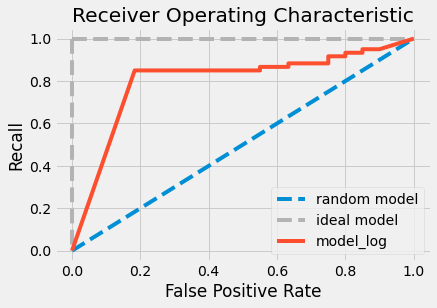

In [117]:
roc_curve_plot(false_positive_rate_log, recall_log, "model_log")

ROC AUC Measure

In [122]:
from sklearn.metrics import roc_auc_score

In [123]:
print("roc_auc_score for model:", roc_auc_score(target_test, target_test_pred_proba_reg[:, 1]))

roc_auc_score for model: 0.8023611111111111


In [130]:
#END